In [61]:
#Importamos librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

### Importamos datos del csv

In [3]:
dataset = pd.read_csv('prediccion_aceptacion.csv', usecols=[1,2,3,4,5,6,7,8])
#Por intuición nos deshacemos de la columna serial no porque no aporta al modelo
dataset.columns
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


### Hacemos gráficos individuales de las variables

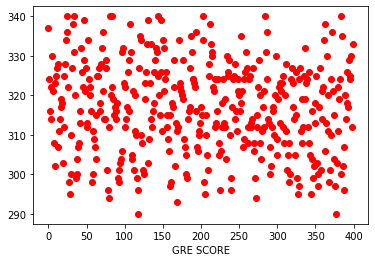

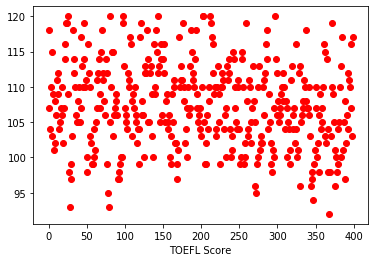

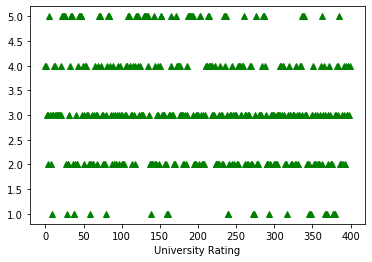

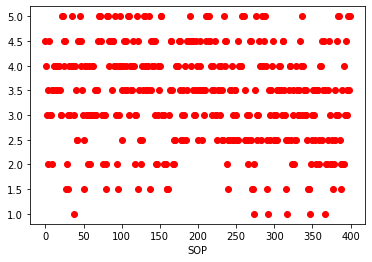

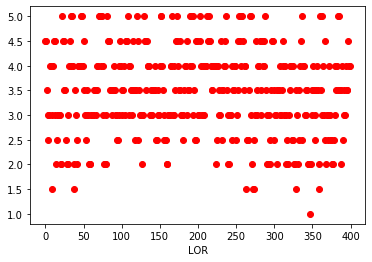

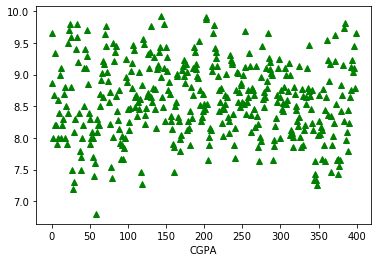

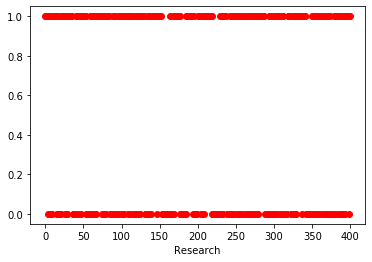

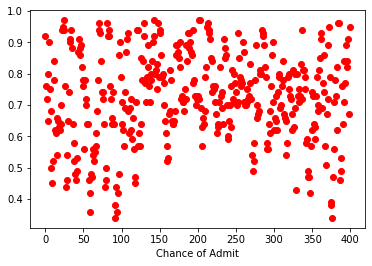

In [4]:
def plotear_variables(x_label, y_label, datos, tipo):
    plt.plot(datos,tipo)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()

#Gráficas de todas las variables
plotear_variables('GRE SCORE', '', dataset['GRE Score'],'ro')
plotear_variables('TOEFL Score', '', dataset['TOEFL Score'],'ro')
plotear_variables('University Rating', '', dataset['University Rating'],'g^')
plotear_variables('SOP', '', dataset['SOP'],'ro')
plotear_variables('LOR', '', dataset['LOR '],'ro')
plotear_variables('CGPA', '', dataset['CGPA'],'g^')
plotear_variables('Research', '', dataset['Research'],'ro')
plotear_variables('Chance of Admit', '', dataset['Chance of Admit '],'ro')

### Hacemos un heatmap con las correlaciones de las variables

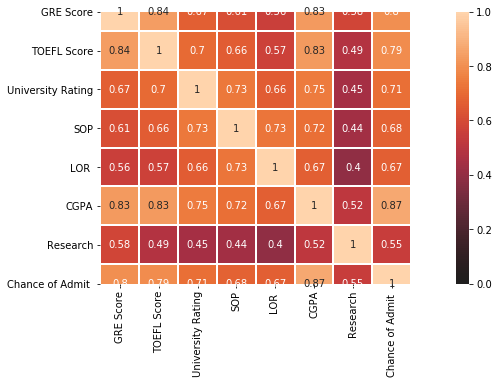

In [13]:
#funcion extraída de: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
corr = dataset.corr()
plt.figure(figsize = (16,5))
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0,
    square=True,
    annot=True,
    linewidths = 1,
)


##### Se decide multiplicar las variables que tienen mas de 0.7 de correlación, para utilizarlas como una

In [16]:
TOELF_GRE_CGPA_SCORE = dataset['GRE Score']*dataset['TOEFL Score']*dataset['CGPA']
LOR_SOP = dataset['LOR ']*dataset['SOP']


### Se hace un scatter plot para ver la relación con la variable respuesta

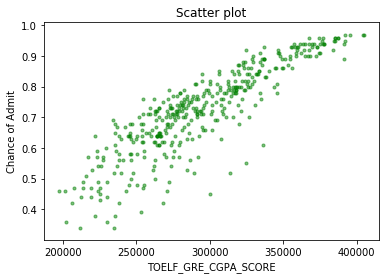

In [21]:
area = np.pi*3
plt.scatter(TOELF_GRE_CGPA_SCORE, dataset['Chance of Admit '], s=area, c="green", alpha=0.5)
plt.title('Gráfico de dispersión')
plt.xlabel('TOELF_GRE_CGPA_SCORE')
plt.ylabel('Chance of Admit')
plt.show()

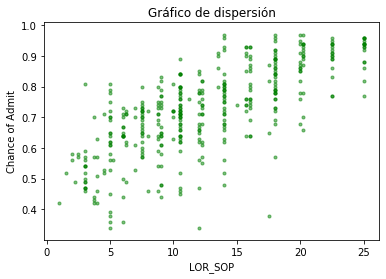

In [22]:
plt.scatter(LOR_SOP, dataset['Chance of Admit '], s=area, c="green", alpha=0.5)
plt.title('Gráfico de dispersión')
plt.xlabel('LOR_SOP')
plt.ylabel('Chance of Admit')
plt.show()

### Funciones provistas por profesor/trabajadas en clase

In [39]:
def linear_cost_derivate(X,
                         y,
                         theta,
                         llambda):
    return np.matmul((np.matmul(X, theta)-y).T,X).T.sum()/X.shape[0] + theta.sum()*llambda/X.shape[0]

def linear_cost (X,
                 y,
                 theta,
                 llambda):
    return ((np.matmul(X, theta)-y)**2).sum()*(1/2*X.shape[0])  + (theta ** 2).sum()*(llambda/2*X.shape[0])

def gradient_descent(
    X,
    y,
    theta_0,
    cost,
    cost_derivate,
    alpha=0.00001,
    llambda=0.000001,
    treshold=0.0001,
    max_iter=10000):
    costs = []
    gradient_norms = []
    theta, i = theta_0, 0
    while np.linalg.norm(cost_derivate(X,y,theta,alpha)) > treshold and i <max_iter:
        theta = theta - (alpha * cost_derivate(X,y,theta,alpha))
        i +=1
        costs.append(cost(X, y, theta,alpha))
        gradient_norms.append(cost_derivate(X, y, theta, alpha))
    return theta, costs, gradient_norms

### Hacemos nuestro nuevo dataframe

In [88]:
new_dataset = pd.DataFrame({'TOELF_GRE_CGPA_SCORE':TOELF_GRE_CGPA_SCORE,'LOR_SOP': LOR_SOP})
new_dataset

,TOELF_GRE_CGPA_SCORE,LOR_SOP
0,383741.90,20.25
1,307505.16,18.00
2,262912.00,10.50
3,307091.40,8.75
4,265527.82,6.00
...,...,...
395,322185.60,12.25
396,316800.25,10.50
397,361746.00,22.50
398,282154.08,14.00


In [97]:
xTrain, xTest, yTrain, yTest = train_test_split(new_dataset.iloc[:,:-1], new_dataset.iloc[:,-1], test_size = 0.4, random_state = 0)
xTest, crossx, yTest, crossy = train_test_split(xTest,yTest, test_size = 0.5, random_state = 0)

xTrain = xTrain.values
crossx = crossx.values
yTest = yTest.values


yTrain = yTrain.values.reshape(240,1)
crossy = crossy.values.reshape(80,1)
yTest = yTest.reshape(80,1)


print( xTrain.shape, yTrain.shape )
print( crossx.shape, crossy.shape )
print( xTest.shape, yTest.shape )

(240, 1) (240, 1)
(80, 1) (80, 1)
(80, 1) (80, 1)


In [77]:
"""
Division de datos con numpy
msk = np.random.rand(len(new_dataset)) < 0.6
train_x = new_dataset[msk]
train_y = dataset['Chance of Admit '][msk]
cont,pond = train_y.shape
np.reshape(train_y,(cont,1))
test_x = new_dataset[~msk]
test_y = dataset['Chance of Admit '][~msk]
#test_y.reshape(len(test_y),1)
msk_2 = np.random.rand(len(test_x)) <= 0.5
cross_validationx = test_x[msk_2]
cross_validationy = test_y[~msk_2]
print( train_x.shape, train_y.shape )
print( test_x.shape, test_y.shape )
print( cross_validationx.shape, cross_validationy.shape )
"""

"\nDivision de datos con numpy\nmsk = np.random.rand(len(new_dataset)) < 0.6\ntrain_x = new_dataset[msk]\ntrain_y = dataset['Chance of Admit '][msk]\ncont,pond = train_y.shape\nnp.reshape(train_y,(cont,1))\ntest_x = new_dataset[~msk]\ntest_y = dataset['Chance of Admit '][~msk]\n#test_y.reshape(len(test_y),1)\nmsk_2 = np.random.rand(len(test_x)) <= 0.5\ncross_validationx = test_x[msk_2]\ncross_validationy = test_y[~msk_2]\nprint( train_x.shape, train_y.shape )\nprint( test_x.shape, test_y.shape )\nprint( cross_validationx.shape, cross_validationy.shape )\n"

In [125]:
m, n = xTrain.shape
theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    xTrain,
    yTrain,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.000000000001,
    llambda=0.00001,
    treshold=0.00001,
    max_iter=10000000
)

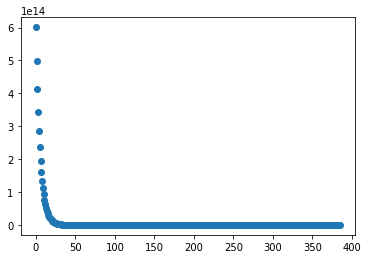

In [126]:
plt.scatter(list(range(0,len(costs))),costs)

In [127]:
linear_cost(xTest,yTest,theta,0.001)

TOELF_GRE_CGPA_SCORE    62027.509326
dtype: float64

In [129]:
linear_cost(crossx,crossy, theta, 0.000001)

69839.61116697759